In [1]:
import sys 

from elasticc_for_etienne import *

sys.path.insert(1, '/media3/etienne/workdir/spark_AGN/Visualise')
from visualise_tools import *

sys.path.insert(1, '/media3/etienne/workdir/spark_AGN/Build_classifier')
from classifier_tools import *

In [2]:
name = 'ELASTICC_TRAIN_KN_B19_bazin_cut_features'
main_file = 'bazin_features'

features = pd.read_parquet(f'{main_file}/{name}.parquet')

FileNotFoundError: bazin_features/ELASTICC_TRAIN_KN_B19_bazin_cut_features.parquet

In [52]:
main_file = 'bazin_features'


name_1 = 'ELASTICC_TRAIN_SNIa-SALT2_features'
features_1 = pd.read_parquet(f'{main_file}/{name_1}.parquet')
features_1['target']='Ia'

name_2 = 'ELASTICC_TRAIN_SNIb+HostXT_V19_features'
features_2 = pd.read_parquet(f'{main_file}/{name_2}.parquet')
features_2['target']='Ib'

features = pd.concat([features_1, features_2])

In [55]:
param_names = list(features.keys())

Index(['a_g', 't0_g', 'tfall_g', 'trise_g', 'error_g', 'a_r', 't0_r',
       'tfall_r', 'trise_r', 'error_r', 'a_i', 't0_i', 'tfall_i', 'trise_i',
       'error_i', 'max_flux', 'max_time', 'target'],
      dtype='object')

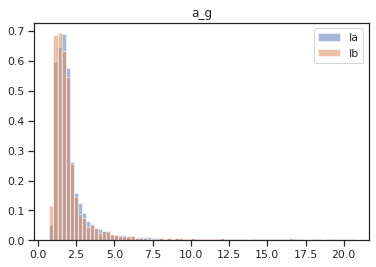

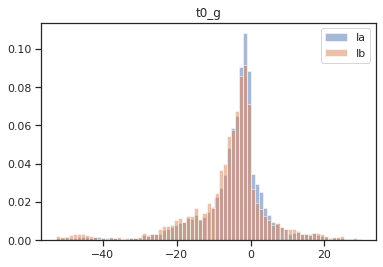

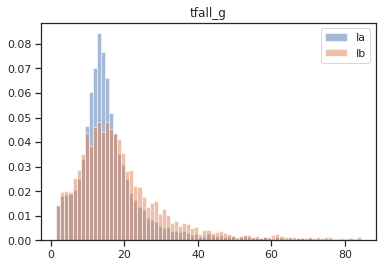

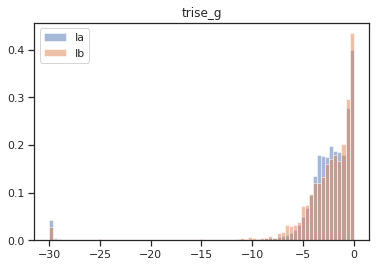

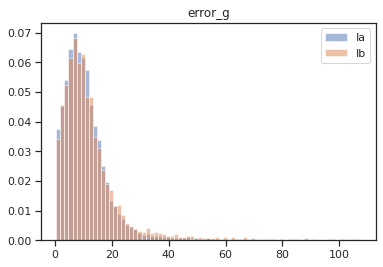

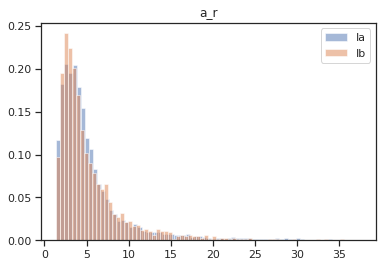

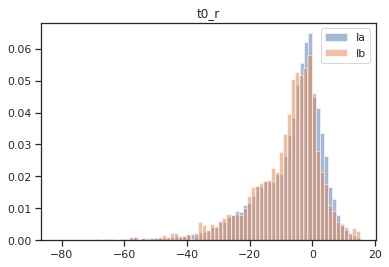

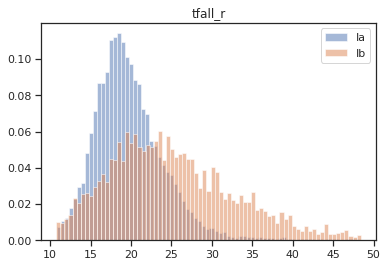

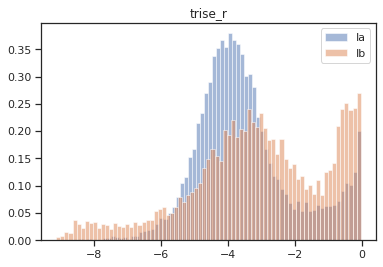

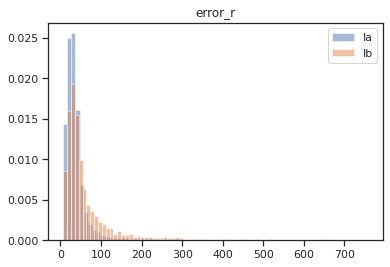

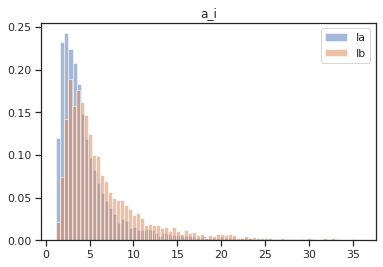

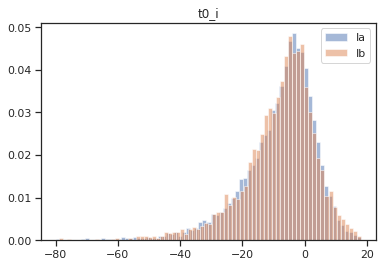

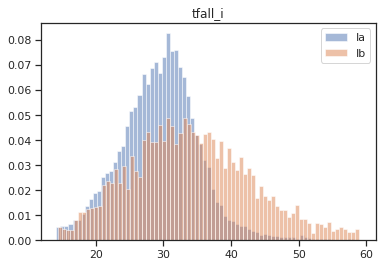

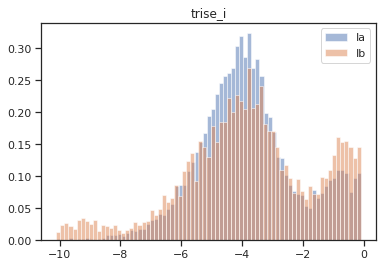

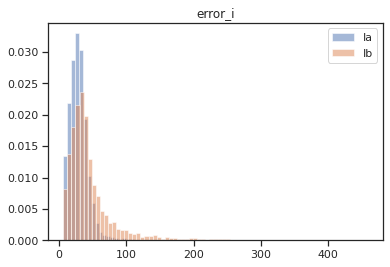

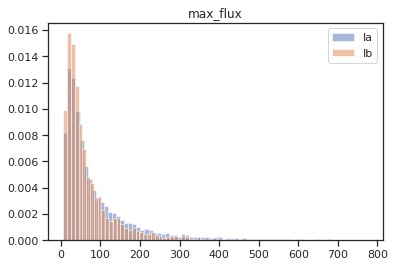

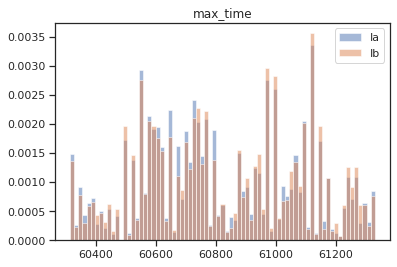

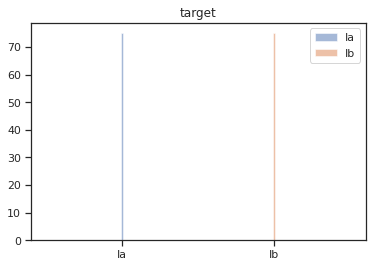

In [56]:
for i in features.keys():
    plt.figure()
    plt.title(i)
    
    zoom = zoom_in(features, 0.95, param_names)
    zoom_features = features[zoom]
    
    nbins = 75
    
    for target in np.unique(features['target']):
        plt.hist(zoom_features[zoom_features['target']==target][i], bins = nbins, alpha=0.5, density=True, label=target);
    
        plt.legend()
features.keys()

In [63]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(features.iloc[:, :-1])
scored = features.copy()
scored['score'] = clf.decision_function(features.iloc[:, :-1])
scored['anomaly'] = scored['score']<-0.25

In [64]:
scored[scored['anomaly']]

,a_g,t0_g,tfall_g,trise_g,error_g,a_r,t0_r,tfall_r,trise_r,error_r,a_i,t0_i,tfall_i,trise_i,error_i,max_flux,max_time,target,score,anomaly
5215,0.607280,13.544452,39.539569,-0.049681,3.927942,39.999996,40.704341,499.996887,-0.004318,44896.962280,40.000000,30.995740,499.999956,-1.346198,15674.620593,7.789429,61259.2943,Ia,-0.257162,True
6940,1.162622,-8.009615,51.368451,-0.264412,0.010055,39.999962,53.779457,499.999523,-0.000006,96859.061336,40.000000,53.929623,500.000000,-0.000004,38019.441537,4.746741,61124.1901,Ia,-0.251331,True
12240,0.884449,6.128427,0.515043,-0.509616,0.424270,39.999987,86.905063,499.999969,-0.000002,33051.013432,39.999962,77.908142,499.999523,-0.000002,28949.538009,1.976808,61050.1623,Ia,-0.250985,True
26094,39.998518,-199.980892,49.779504,-14.289398,10.528938,40.000000,-200.000000,2.765885,-2.699499,34011.837266,40.000000,-200.000000,2.440433,-2.410627,17360.727702,5.814912,60737.2291,Ia,-0.269372,True
26924,1.862174,5.026102,51.916349,-0.434876,2.685152,40.000000,30.769663,500.000000,-0.000042,42690.126278,39.999996,41.639503,494.393114,-0.006906,20354.506096,3.101227,61258.2745,Ia,-0.257339,True
3888,0.738151,-56.623877,337.324449,-3.762716,6.815936,40.000000,-200.000000,3.059527,-2.940453,28406.502116,40.000000,-199.999998,2.660450,-2.601468,26073.001404,8.522926,60876.3720,Ib,-0.250056,True
4401,1.078357,-8.315613,125.350398,-1.789342,1.989152,40.000000,-200.000000,46.578653,-26.668162,14436.175844,40.000000,-200.000000,74.391418,-30.000000,15577.035313,48.791302,60559.3130,Ib,-0.250815,True
7052,17.204885,-19.371716,6.912185,-6.137150,7.169042,40.000000,-200.000000,92.374684,-21.585612,9432.887955,40.000000,-200.000000,125.944317,-29.999999,11047.664560,5.208285,61178.3561,Ib,-0.250432,True
7428,1.950686,-60.940457,98.028116,-20.422264,9.867470,19.806189,-200.000000,68.032503,-11.293517,43122.435695,39.789399,-200.000000,82.143653,-16.090508,109518.171520,325.006927,61061.2667,Ib,-0.254288,True
7991,1.341510,-76.444670,207.121148,-25.507936,18.405139,40.000000,-200.000000,51.005382,-26.125885,13244.095751,40.000000,-199.999999,47.664532,-29.999999,19252.237200,8.521305,61085.2298,Ib,-0.274860,True
